<H1> KIPA PROJECT </H1>
<H3> MDSSB-DSAI-01 DIGITAL TRANSFORMATION </H3>
Aiman Alam | Modou Lamin Manjang | Husnain Dawood | Niloufar Shokri | Sergey Polyarus | Suraj Karakulath

We want to find correlations/patterns between the price of waste (bought from suppliers) and various potential price determinants such as weather, energy, business cycle, Euwid and Quantities.

In [688]:
#Importing libraries (include plotly)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)


In [689]:
#Pricing dataset 
df = pd.read_excel('df.xlsx')
df.head()

,week,wPreis,Plz,full,date
0,2020-37,-37.519318,"['25', '24']",A2 - geschreddert,2020-09-14
1,2020-39,-40.000000,"['25', '24']",A2 - geschreddert,2020-09-28
2,2020-41,-34.853543,"['25', '24']",A2 - geschreddert,2020-10-12
3,2020-42,-27.560202,"['25', '24']",A2 - geschreddert,2020-10-19
4,2020-43,-31.937780,"['25', '24']",A2 - geschreddert,2020-10-26


## Quick Exploration of Pricing Dataset

In [690]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3379 entries, 0 to 3378
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   week    3379 non-null   object        
 1   wPreis  3379 non-null   float64       
 2   Plz     3379 non-null   object        
 3   full    3379 non-null   object        
 4   date    3379 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 132.1+ KB


There are no null values in any of the 3379 observations.

In [691]:
df['Plz'].unique()

array(["['25', '24']", "['26', '27', '28']", "['20', '21', '22', '23']",
       "['29', '30', '31', '38', '39']",
       "['10', '11', '12', '13', '14', '15', '16']", "['48', '49']",
       "['1', '4', '6', '7', '8', '9']",
       "['40', '41', '42', '44', '45', '46', '47']",
       "['50', '51', '52', '53']",
       "['80', '81', '82', '83', '84', '85', '93', '94']"], dtype=object)

In [692]:
len(df['Plz'].unique())

10

There are 10 unique clusters.

In [693]:
df['full'].unique()

array(['A2 -  geschreddert', 'A1 & A2 -  geschreddert',
       'A2 & A3 -  geschreddert', 'A3 -  geschreddert'], dtype=object)

And 4 unique product categories.

"['10', '11', '12', '13', '14', '15', '16']", "['48', '49']"

We explore a few clusters by splitting among ourselves as:
[Monday 13:25] Shokri, Niloufar

- Nilou: ['25', '24']", "['26', '27', '28']", "['20', '21', '22', '23']
- Aiman: "['29', '30', '31', '38', '39']
- Suraj: "['10', '11', '12', '13', '14', '15', '16']", "['48', '49']
- Momo: "['1', '4', '6', '7', '8', '9']

### Cluster '25','24'

Looking at the **['25','24'] ** cluster for the **product category 'A2 -  geschreddert'** first.

In [694]:
TS1 = df[(df['Plz'] == "['25', '24']")]
TS1.head()

,week,wPreis,Plz,full,date
0,2020-37,-37.519318,"['25', '24']",A2 - geschreddert,2020-09-14
1,2020-39,-40.000000,"['25', '24']",A2 - geschreddert,2020-09-28
2,2020-41,-34.853543,"['25', '24']",A2 - geschreddert,2020-10-12
3,2020-42,-27.560202,"['25', '24']",A2 - geschreddert,2020-10-19
4,2020-43,-31.937780,"['25', '24']",A2 - geschreddert,2020-10-26


In [695]:
fig = px.line(TS1, x='date', y='wPreis', color='full', title='Weekly Prices for [25,24] by Category')
fig.show()

### Cluster '26', '27', '28'

In [696]:
TS2 = df[(df['Plz'] == "['26', '27', '28']")]
TS2.tail()

,week,wPreis,Plz,full,date
768,2023-32,-0.779286,"['26', '27', '28']",A2 & A3 - geschreddert,2023-08-07
769,2023-33,0.603443,"['26', '27', '28']",A2 & A3 - geschreddert,2023-08-14
770,2023-34,-1.843453,"['26', '27', '28']",A2 & A3 - geschreddert,2023-08-21
771,2023-35,12.932210,"['26', '27', '28']",A2 & A3 - geschreddert,2023-08-28
772,2023-36,10.456992,"['26', '27', '28']",A2 & A3 - geschreddert,2023-09-04


In [697]:
fig = px.line(TS2, x='date', y='wPreis', color='full', title='Weekly Prices for [26,27,28] by Category')
fig.show()

### Cluster '20', '21', '22', '23'

In [698]:
TS3 = df[(df['Plz'] == "['20', '21', '22', '23']")]

fig = px.line(TS3, x='date', y='wPreis', color='full', title='Weekly Prices for [20,21,22,23] by Product Category')
fig.show()

### Cluster '10', '11', '12', '13', '14', '15', '16'

In [699]:
TS4 = df[(df['Plz'] == "['10', '11', '12', '13', '14', '15', '16']")]  
fig = px.line(TS4, x='date', y='wPreis', color='full', title='Weekly Prices for [10, 11, 12, 13, 14, 15, 16] by Category')
fig.show()

### Cluster '48', '49'

In [700]:
TS5 = df[(df['Plz'] == "['48', '49']")]  
fig = px.line(TS5, x='date', y='wPreis', color='full', title='Weekly Prices for [48, 49] by Category')
fig.show()

### Cluster '1', '4', '6', '7', '8', '9'

In [701]:
TS7 = df[(df['Plz'] == "['1', '4', '6', '7', '8', '9']")]  
TS7.head()


,week,wPreis,Plz,full,date
2154,2020-37,3.314264,"['1', '4', '6', '7', '8', '9']",A1 & A2 - geschreddert,2020-09-14
2155,2020-38,6.106024,"['1', '4', '6', '7', '8', '9']",A1 & A2 - geschreddert,2020-09-21
2156,2020-39,8.117571,"['1', '4', '6', '7', '8', '9']",A1 & A2 - geschreddert,2020-09-28
2157,2020-40,12.717265,"['1', '4', '6', '7', '8', '9']",A1 & A2 - geschreddert,2020-10-05
2158,2020-41,13.049207,"['1', '4', '6', '7', '8', '9']",A1 & A2 - geschreddert,2020-10-12


In [702]:
fig = px.line(TS7, x='date', y='wPreis', color='full', title='Weekly Prices for [1, 4, 6, 7, 8, 9] by Category')
fig.show()

Interestingly for 7th cluster, [1, 4, 6, 7, 8, 9] just like the forth cluster, there is only one waste category, *A1 & A2*


### Cluster '40', '41', '42', '44', '45', '46', '47'

In [703]:
TS8 = df[(df['Plz'] == "['40', '41', '42', '44', '45', '46', '47']")]  
TS8.head()


,week,wPreis,Plz,full,date
2297,2020-37,-45.783077,"['40', '41', '42', '44', '45', '46', '47']",A3 - geschreddert,2020-09-14
2298,2020-38,-31.691897,"['40', '41', '42', '44', '45', '46', '47']",A3 - geschreddert,2020-09-21
2299,2020-39,-32.208389,"['40', '41', '42', '44', '45', '46', '47']",A3 - geschreddert,2020-09-28
2300,2020-40,-26.762905,"['40', '41', '42', '44', '45', '46', '47']",A3 - geschreddert,2020-10-05
2301,2020-41,-28.922455,"['40', '41', '42', '44', '45', '46', '47']",A3 - geschreddert,2020-10-12


In [704]:
fig = px.line(TS8, x='date', y='wPreis', color='full', title='Weekly Prices for [40, 41, 42, 44, 45 46, 47] by Category')
fig.show()

The wPreis of categories in the same cluster follow a similar series, almost identical.

<h2> Exploring Potential Price Determinants </h2>

### 1. Energy (Electricity, Oil and Gas)

####  Oil first. 

- We do not have access to any data that has oil prices per region in Germany (it may not make sense either)
- So we look at Global Oil and Gas Market Prices as a proxy from Yahoo finance https://finance.yahoo.com/quote/CL%3DF/history?period1=1599436800&period2=1694649600&interval=1wk&filter=history&frequency=1wk&includeAdjustedClose=true   (No download option but can copy and paste into excel)
- And *assume that relative changes in global prices have a proportional impact on the same prices in Germany*

In [705]:
#Oil
oil = pd.read_excel('Crude_oil.xlsx')
oil.head() 

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Sep 11, 2023",87.40,89.64,86.71,88.52,88.52,974.662
1,"Sep 04, 2023",86.06,88.08,85.02,87.51,87.51,"1,325,196"
2,"Aug 28, 2023",80.15,86.06,79.34,85.55,85.55,"1,619,479"
3,"Aug 21, 2023",81.43,82.47,77.59,79.83,79.83,"1,542,148"
4,"Aug 14, 2023",83.09,83.20,78.95,81.25,81.25,"1,269,633"


When exploring correlations between weekly oil prices and the price of another commodity like waste, the "Close" or "Adj Close" price is often used.

**Close Price**: The "Close" price represents the closing price of the commodity for a specific trading day. It is the last price at which a trade occurred before the market closed for that day. This is a commonly used price metric for historical price analysis.

**Adjusted Close Price (Adj Close)**: The "Adj Close" price accounts for events such as stock splits and dividend payments. It is often considered more accurate for long-term analysis because it adjusts for corporate actions that can affect the price. In the context of Crude Oil, if there are similar adjustments, the "Adj Close" can be a better choice for long-term correlations.

In [706]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         158 non-null    object 
 1   Open         158 non-null    float64
 2   High         158 non-null    float64
 3   Low          158 non-null    float64
 4   Close*       158 non-null    float64
 5   Adj Close**  158 non-null    float64
 6   Volume       158 non-null    object 
dtypes: float64(5), object(2)
memory usage: 8.8+ KB


158 entries for each week and no null values.

Transformation: Date here is in an object format so we convert it to datetime64[ns]

In [707]:
oil["Date"] = pd.to_datetime(oil["Date"])

In [708]:
oil.sort_values(by='Date')

,Date,Open,High,Low,Close*,Adj Close**,Volume
157,2020-09-07,39.48,39.59,36.13,37.33,37.33,"1,907,673"
156,2020-09-14,37.32,41.49,36.82,41.11,41.11,"1,430,611"
155,2020-09-21,40.98,41.27,38.66,40.25,40.25,"1,171,773"
154,2020-09-28,40.07,40.80,36.63,37.05,37.05,"1,781,188"
153,2020-10-05,37.00,41.47,37.00,40.60,40.60,"1,953,665"
...,...,...,...,...,...,...,...
4,2023-08-14,83.09,83.20,78.95,81.25,81.25,"1,269,633"
3,2023-08-21,81.43,82.47,77.59,79.83,79.83,"1,542,148"
2,2023-08-28,80.15,86.06,79.34,85.55,85.55,"1,619,479"
1,2023-09-04,86.06,88.08,85.02,87.51,87.51,"1,325,196"


#### Distribution of crude oil prices (Adj Close)

Quick look at the distribution of crude oil prices (Adj Close)

In [709]:
fig = px.line(oil, x='Date', y='Adj Close**', title='Weekly Adjusted Close Price for Crude Oil')
fig.show()

#### Correlation of Adj Close Price with the wPreis of only one of the clusters (48,49)

Now exploring the correlation of this Adjusted Close Price with the wPreis of **only one of the clusters (48,49):**
For this we combine the 2 dataframes (TS5 and oil) - INNER JOIN by the 'date' variable in TS5 and 'Date' variable in oil (which has been transformed)

In [710]:
combined_df = pd.merge(TS5[['date', 'wPreis', 'full']], oil[['Date', 'Adj Close**']], left_on='date', right_on='Date', how='inner')
# And drop the duplicate 'Date' column 
combined_df = combined_df.drop(columns='Date')
combined_df


,date,wPreis,full,Adj Close**
0,2020-09-14,-29.244584,A3 - geschreddert,41.11
1,2020-09-14,-29.244584,A2 & A3 - geschreddert,41.11
2,2020-09-21,-27.878925,A3 - geschreddert,40.25
3,2020-09-21,-27.878925,A2 & A3 - geschreddert,40.25
4,2020-09-28,-25.077400,A3 - geschreddert,37.05
...,...,...,...,...
295,2023-08-21,4.426446,A2 & A3 - geschreddert,79.83
296,2023-08-28,5.545975,A3 - geschreddert,85.55
297,2023-08-28,5.545975,A2 & A3 - geschreddert,85.55
298,2023-09-04,8.037723,A3 - geschreddert,87.51


In [711]:
# Get unique categories
categories = combined_df['full'].unique()

# Create a Plotly figure
fig = go.Figure()

# Loop through each category and add a trace for it
for category in categories:
    category_data = combined_df[combined_df['full'] == category]
    fig.add_trace(go.Scatter(x=category_data['date'], y=category_data['wPreis'], mode='lines', name=f'wPreis ({category})'))
    fig.add_trace(go.Scatter(x=category_data['date'], y=category_data['Adj Close**'], mode='lines', name=f'Adj Close** ({category})'))

# Customize the layout
fig.update_layout(
    title="Time Series Comparison by Category for the cluster [48,49]",
    xaxis_title="Date",
    yaxis_title="Value",
    xaxis=dict(type='date'),
)

# Show the legend
fig.update_layout(showlegend=True)

# Display the plot
fig.show()

Some quick observations (purely from visualization):
- The wPreis and Adj Close price of Crude oil for both categories seem to be **closely correlated from Sep 2020 to around Jan 2022**. 
- For **Category A3 - geschreddert**, the correlation roughly continues *until June 2022* after which it becomes an **inverse correlation** until December 2022 and then low correlation until Sep 2023
- For **Category A2 & A3 - geschreddert**, the correlation continues from Jan 2022 to around March 2022 after which they slowly become inverse correlated until Dec 2022, and similar to the other category, loses the correlation after that.

Something remained consistent until Jan 2022. After that things began going in the opposite direction. And from Dec 2022 onwards they become less correlated.

To get a measure of the correlation, we calculate the correlation coefficients in a heatmap. They are 0.6 for A3 -  geschreddert category and 0.62 for A2 & A3 -  geschreddert which are above 0.5 and hence significant.

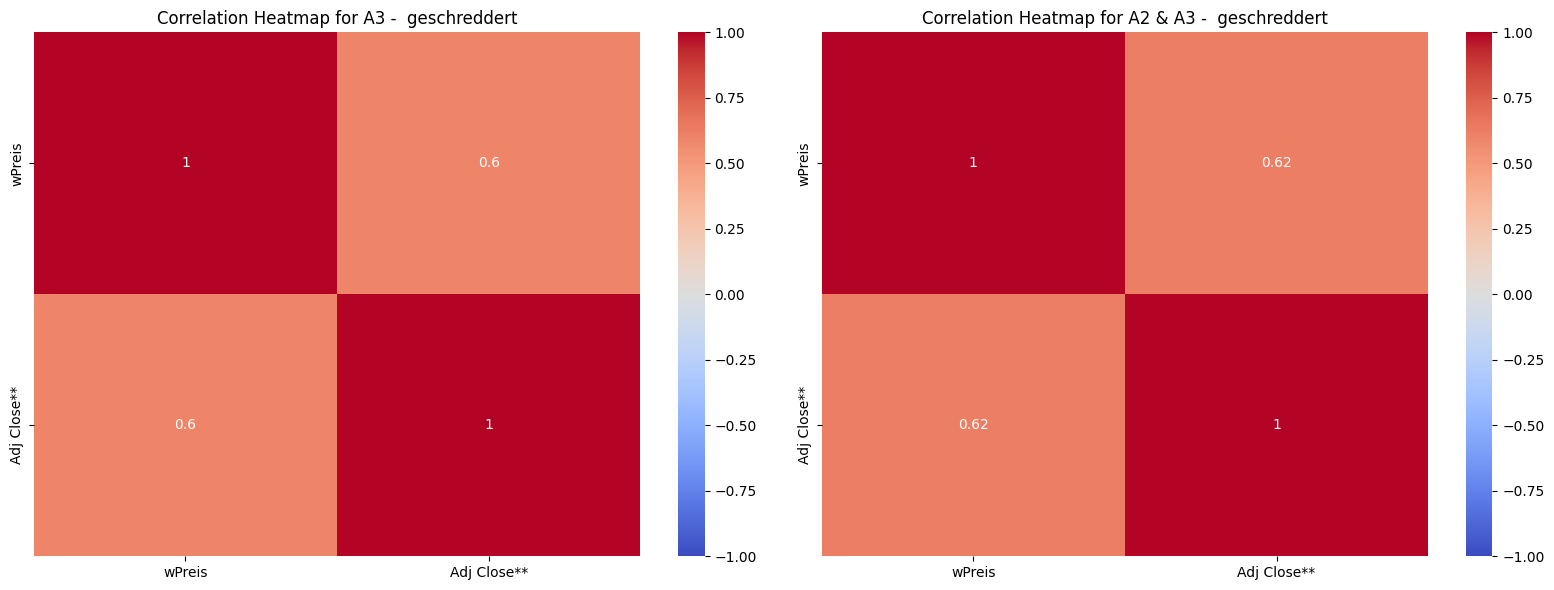

In [712]:
 # Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Loop through each category and create a heatmap
for i, category in enumerate(categories):
    category_data = combined_df[combined_df['full'] == category]
    correlation_matrix = category_data[['wPreis', 'Adj Close**']].corr()
    
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axes[i])
    axes[i].set_title(f'Correlation Heatmap for {category}')

# Adjust layout spacing
plt.tight_layout()

# Show the subplots
plt.show()

In [713]:
# Loop through each category and calculate the correlation values
correlation_values = []
for category in categories:
    category_data = combined_df[combined_df['full'] == category]
    correlation_matrix = category_data[['wPreis', 'Adj Close**']].corr()
    correlation_value = correlation_matrix.iloc[0, 1]  # Get the correlation value between 'wPreis' and 'Adj Close**'
    correlation_values.append((category, correlation_value))

# Print the correlation values
for category, correlation in correlation_values:
    print(f'Correlation for {category}: {correlation:.2f}')

Correlation for A3 -  geschreddert: 0.60
Correlation for A2 & A3 -  geschreddert: 0.62


#### Correlation for Oil with Lag
Start with 1-week lag

In [714]:
combined_df['wPreis_lagged_week'] = combined_df['wPreis'].shift(1)
#combined_df


In [715]:
# Get unique categories
categories = combined_df['full'].unique()

# Create a Plotly figure
fig = go.Figure()

# Loop through each category and add a trace for it
for category in categories:
    category_data = combined_df[combined_df['full'] == category]
    fig.add_trace(go.Scatter(x=category_data['date'], y=category_data['wPreis_lagged_week'], mode='lines', name=f'wPreis_lagged_week ({category})'))
    fig.add_trace(go.Scatter(x=category_data['date'], y=category_data['Adj Close**'], mode='lines', name=f'Adj Close** ({category})'))

# Customize the layout
fig.update_layout(
    title="Time Series Comparison (wPreis_lagged_week) by Category for the cluster [48,49]",
    xaxis_title="Date",
    yaxis_title="Value",
    xaxis=dict(type='date'),
)

# Show the legend
fig.update_layout(showlegend=True)

# Display the plot
fig.show()

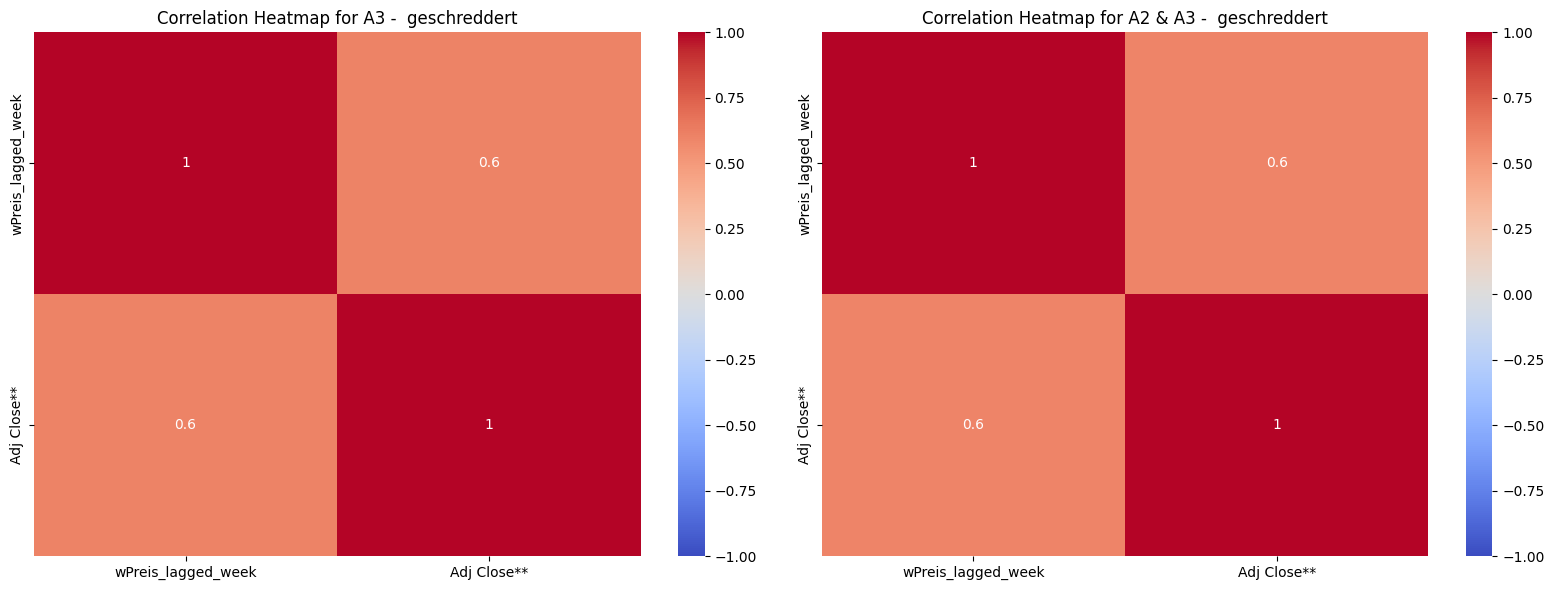

In [716]:
# Create a figure with heatmaps side by side
fig, axes = plt.subplots(1, len(categories), figsize=(16, 6))

# Loop through each category and create a heatmap
for i, category in enumerate(categories):
    category_data = combined_df[combined_df['full'] == category]
    
    # Create the correlation heatmap
    correlation_matrix = category_data[['wPreis_lagged_week', 'Adj Close**']].corr()
    ax_heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axes[i])
    ax_heatmap.set_title(f'Correlation Heatmap for {category}')
    
# Adjust layout spacing
plt.tight_layout()

# Show the subplots
plt.show()

In [717]:
# Loop through each category and calculate the correlation values
correlation_values = []
for category in categories:
    category_data = combined_df[combined_df['full'] == category]
    correlation_matrix = category_data[['wPreis_lagged_week', 'Adj Close**']].corr()
    correlation_value = correlation_matrix.iloc[0, 1]  # Get the correlation value between 'wPreis' and 'Adj Close**'
    correlation_values.append((category, correlation_value))

# Print the correlation values
for category, correlation in correlation_values:
    print(f'Correlation for {category}: {correlation:.2f}')

Correlation for A3 -  geschreddert: 0.60
Correlation for A2 & A3 -  geschreddert: 0.60


Now for lags by a few more weeks:

In [718]:
# Define the range of lags
lags = range(2, 11)

# Create an empty DataFrame to store the results
lag_correlations = pd.DataFrame(columns=['Category', 'Lag', 'Correlation'])

# Loop through each category and lag and calculate the correlation
for category in categories:
    for lag in lags:
        category_data = combined_df[combined_df['full'] == category]
        
        # Calculate the lagged variable
        category_data['wPreis_lagged'] = category_data['wPreis'].shift(lag)
        
        # Calculate the correlation between wPreis_lagged and Adj Close**
        correlation = category_data['wPreis_lagged'].corr(category_data['Adj Close**'])
        
        # Append the result to the DataFrame
        lag_correlations = lag_correlations.append({'Category': category, 'Lag': lag, 'Correlation': correlation}, ignore_index=True)

# Display the correlation coefficients for each category and lag
print(lag_correlations)

                   Category Lag  Correlation
0        A3 -  geschreddert   2     0.570127
1        A3 -  geschreddert   3     0.551046
2        A3 -  geschreddert   4     0.529585
3        A3 -  geschreddert   5     0.514884
4        A3 -  geschreddert   6     0.503870
5        A3 -  geschreddert   7     0.480222
6        A3 -  geschreddert   8     0.454619
7        A3 -  geschreddert   9     0.439824
8        A3 -  geschreddert  10     0.420328
9   A2 & A3 -  geschreddert   2     0.590616
10  A2 & A3 -  geschreddert   3     0.577857
11  A2 & A3 -  geschreddert   4     0.564648
12  A2 & A3 -  geschreddert   5     0.552081
13  A2 & A3 -  geschreddert   6     0.544712
14  A2 & A3 -  geschreddert   7     0.524520
15  A2 & A3 -  geschreddert   8     0.501037
16  A2 & A3 -  geschreddert   9     0.487971
17  A2 & A3 -  geschreddert  10     0.467319


/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_88867/744885961.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_88867/744885961.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_88867/744885961.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

The time series for wPreis with a 1-week lag also doesn't show visually any different correlation. The coefficients have infact decreased slightly and continue to decrease with more lags.

#### Electricity next.
The data is *available only from 1 Jan 2021*. The spot market prices arise or are calculated from the hourly prices and quantities of all electricity exchanges. And values are for Germany not regional.

In [719]:
elec = pd.read_csv('electricity.csv', sep=';')
elec.head() 

,Datum,von,Zeitzone von,bis,Zeitzone bis,Spotmarktpreis in ct/kWh
0,01.01.2021,00:00,CET,01:00,CET,"5,087"
1,01.01.2021,01:00,CET,02:00,CET,"4,819"
2,01.01.2021,02:00,CET,03:00,CET,"4,468"
3,01.01.2021,03:00,CET,04:00,CET,"4,292"
4,01.01.2021,04:00,CET,05:00,CET,"4,039"


In [720]:
elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23351 entries, 0 to 23350
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Datum                     23351 non-null  object
 1   von                       23351 non-null  object
 2   Zeitzone von              23351 non-null  object
 3   bis                       23351 non-null  object
 4   Zeitzone bis              23351 non-null  object
 5   Spotmarktpreis in ct/kWh  23351 non-null  object
dtypes: object(6)
memory usage: 1.1+ MB


There are 23351 entries and it makes sense as it is hourly data from Jan 1 2021 (24 hours x (2 years + 8 months + 21 days until Sep 21).

Quick visual exploration. For this, we need to convert Datum to date-time format.

In [721]:
#elec["Datum"] = pd.to_datetime(elec["Datum"])
elec['Datum'] = pd.to_datetime(elec['Datum'], format='%d.%m.%Y')


In [722]:
elec.tail()

,Datum,von,Zeitzone von,bis,Zeitzone bis,Spotmarktpreis in ct/kWh
23346,2023-08-31,19:00,CEST,20:00,CEST,"14,855"
23347,2023-08-31,20:00,CEST,21:00,CEST,"13,915"
23348,2023-08-31,21:00,CEST,22:00,CEST,"12,55"
23349,2023-08-31,22:00,CEST,23:00,CEST,"10,603"
23350,2023-08-31,23:00,CEST,00:00,CEST,"9,689"


In [723]:
elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23351 entries, 0 to 23350
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Datum                     23351 non-null  datetime64[ns]
 1   von                       23351 non-null  object        
 2   Zeitzone von              23351 non-null  object        
 3   bis                       23351 non-null  object        
 4   Zeitzone bis              23351 non-null  object        
 5   Spotmarktpreis in ct/kWh  23351 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 1.1+ MB


#### IMPORTANT: The values of Spotmarktpreis in ct/kWh are in German standard - i.e. comma as decimal. So these need to be converted into decimals.

In [724]:
# Replace commas with periods in the 'Spotmarktpreis in ct/kWh' column and Converting prices into float variables
elec['Spotmarktpreis in ct/kWh'] = elec['Spotmarktpreis in ct/kWh'].str.replace(',', '.').astype(float)
elec.head()


,Datum,von,Zeitzone von,bis,Zeitzone bis,Spotmarktpreis in ct/kWh
0,2021-01-01,00:00,CET,01:00,CET,5.087
1,2021-01-01,01:00,CET,02:00,CET,4.819
2,2021-01-01,02:00,CET,03:00,CET,4.468
3,2021-01-01,03:00,CET,04:00,CET,4.292
4,2021-01-01,04:00,CET,05:00,CET,4.039


In [725]:
elec.sort_values(by='Datum', ascending=False)

,Datum,von,Zeitzone von,bis,Zeitzone bis,Spotmarktpreis in ct/kWh
23350,2023-08-31,23:00,CEST,00:00,CEST,9.689
23338,2023-08-31,11:00,CEST,12:00,CEST,9.200
23327,2023-08-31,00:00,CEST,01:00,CEST,9.631
23328,2023-08-31,01:00,CEST,02:00,CEST,9.176
23329,2023-08-31,02:00,CEST,03:00,CEST,9.143
...,...,...,...,...,...,...
20,2021-01-01,20:00,CET,21:00,CET,5.740
21,2021-01-01,21:00,CET,22:00,CET,5.386
22,2021-01-01,22:00,CET,23:00,CET,5.345
23,2021-01-01,23:00,CET,00:00,CET,4.972


Some cleaning and transformation needed to get a proper datetime variable from combining the date (Datum) and von (hour) variables.

In [728]:
elec['von'] = pd.to_datetime(elec['von'], format='%H:%M')

In [729]:
elec['von'] = elec['von'].dt.strftime('%H:%M:%S')

In [730]:
elec['combined_datetime'] = elec['Datum'] + pd.to_timedelta(elec['von'].astype(str))

In [731]:
elec.tail()

,Datum,von,Zeitzone von,bis,Zeitzone bis,Spotmarktpreis in ct/kWh,combined_datetime
23346,2023-08-31,19:00:00,CEST,20:00,CEST,14.855,2023-08-31 19:00:00
23347,2023-08-31,20:00:00,CEST,21:00,CEST,13.915,2023-08-31 20:00:00
23348,2023-08-31,21:00:00,CEST,22:00,CEST,12.550,2023-08-31 21:00:00
23349,2023-08-31,22:00:00,CEST,23:00,CEST,10.603,2023-08-31 22:00:00
23350,2023-08-31,23:00:00,CEST,00:00,CEST,9.689,2023-08-31 23:00:00


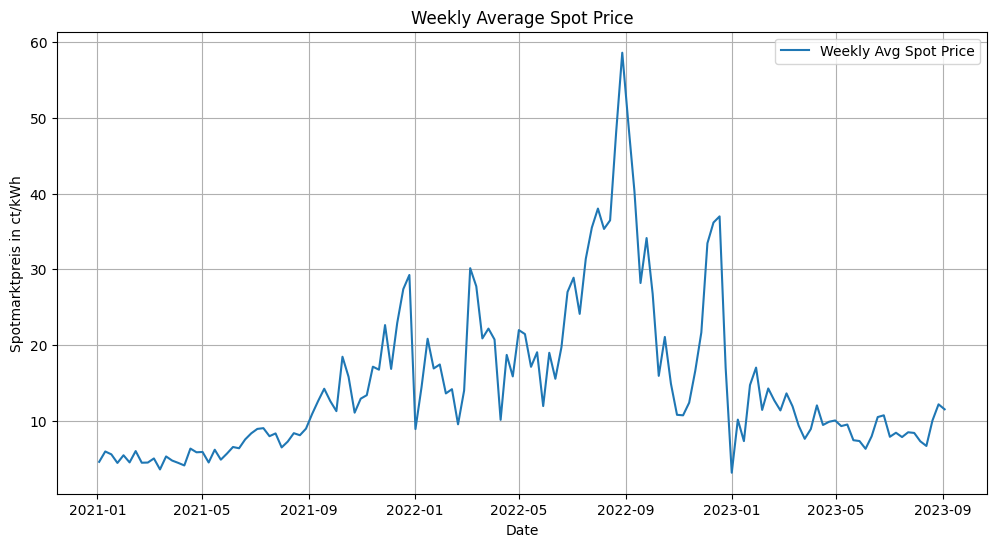

In [733]:
# Resample data to weekly averages
weekly_avg = elec.resample('W', on='combined_datetime').mean()

# Plot the weekly averages
plt.figure(figsize=(12, 6))
plt.plot(weekly_avg.index, weekly_avg['Spotmarktpreis in ct/kWh'], label='Weekly Avg Spot Price')
plt.xlabel('Date')
plt.ylabel('Spotmarktpreis in ct/kWh')
plt.title('Weekly Average Spot Price')
plt.grid(True)
plt.legend()
plt.show()

In [734]:
weekly_avg.reset_index(inplace=True)


In [735]:
weekly_avg

,combined_datetime,Spotmarktpreis in ct/kWh
0,2021-01-03,4.586111
1,2021-01-10,5.954065
2,2021-01-17,5.576946
3,2021-01-24,4.438315
4,2021-01-31,5.455792
...,...,...
135,2023-08-06,7.298726
136,2023-08-13,6.682881
137,2023-08-20,10.042887
138,2023-08-27,12.177613


#### Correlation of Spotmarktpreis in ct/kWh with wPreis for the ['48', '49'] cluster

In [681]:
TS5

,week,wPreis,Plz,full,date
1854,2020-37,-29.244584,"['48', '49']",A3 - geschreddert,2020-09-14
1855,2020-38,-27.878925,"['48', '49']",A3 - geschreddert,2020-09-21
1856,2020-39,-25.077400,"['48', '49']",A3 - geschreddert,2020-09-28
1857,2020-40,-25.663645,"['48', '49']",A3 - geschreddert,2020-10-05
1858,2020-41,-24.004958,"['48', '49']",A3 - geschreddert,2020-10-12
...,...,...,...,...,...
2149,2023-32,17.044359,"['48', '49']",A2 & A3 - geschreddert,2023-08-07
2150,2023-33,4.038512,"['48', '49']",A2 & A3 - geschreddert,2023-08-14
2151,2023-34,4.426446,"['48', '49']",A2 & A3 - geschreddert,2023-08-21
2152,2023-35,5.545975,"['48', '49']",A2 & A3 - geschreddert,2023-08-28


New problem is that the weekly 'date' values in TS5 with the 14th of Sep and the combined_datetime values in weekly_avg may be starting with a different date. So we need a key that can be used to merge both, like the week number.

In [736]:
# Create a new column 'weekno' representing the week number
TS5['weekno'] = TS5['date'].dt.strftime('%U-%Y')  # Format: WeekNumber-Year
TS5

/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_88867/2907048329.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,week,wPreis,Plz,full,date,weekno
1854,2020-37,-29.244584,"['48', '49']",A3 - geschreddert,2020-09-14,37-2020
1855,2020-38,-27.878925,"['48', '49']",A3 - geschreddert,2020-09-21,38-2020
1856,2020-39,-25.077400,"['48', '49']",A3 - geschreddert,2020-09-28,39-2020
1857,2020-40,-25.663645,"['48', '49']",A3 - geschreddert,2020-10-05,40-2020
1858,2020-41,-24.004958,"['48', '49']",A3 - geschreddert,2020-10-12,41-2020
...,...,...,...,...,...,...
2149,2023-32,17.044359,"['48', '49']",A2 & A3 - geschreddert,2023-08-07,32-2023
2150,2023-33,4.038512,"['48', '49']",A2 & A3 - geschreddert,2023-08-14,33-2023
2151,2023-34,4.426446,"['48', '49']",A2 & A3 - geschreddert,2023-08-21,34-2023
2152,2023-35,5.545975,"['48', '49']",A2 & A3 - geschreddert,2023-08-28,35-2023


In [737]:
weekly_avg

,combined_datetime,Spotmarktpreis in ct/kWh
0,2021-01-03,4.586111
1,2021-01-10,5.954065
2,2021-01-17,5.576946
3,2021-01-24,4.438315
4,2021-01-31,5.455792
...,...,...
135,2023-08-06,7.298726
136,2023-08-13,6.682881
137,2023-08-20,10.042887
138,2023-08-27,12.177613


In [738]:
# Create a new column 'weekno' representing the week number
weekly_avg['weekno'] = weekly_avg['combined_datetime'].dt.strftime('%U-%Y')  # Format: WeekNumber-Year
weekly_avg

,combined_datetime,Spotmarktpreis in ct/kWh,weekno
0,2021-01-03,4.586111,01-2021
1,2021-01-10,5.954065,02-2021
2,2021-01-17,5.576946,03-2021
3,2021-01-24,4.438315,04-2021
4,2021-01-31,5.455792,05-2021
...,...,...,...
135,2023-08-06,7.298726,32-2023
136,2023-08-13,6.682881,33-2023
137,2023-08-20,10.042887,34-2023
138,2023-08-27,12.177613,35-2023


In [740]:
# Merge 'TS5' and 'elec' based on the 'week' column
combined_elect = pd.merge(TS5, weekly_avg, on='weekno', how='inner')
combined_elect

,week,wPreis,Plz,full,date,weekno,combined_datetime,Spotmarktpreis in ct/kWh
0,2020-53,-30.855857,"['48', '49']",A3 - geschreddert,2021-01-04,01-2021,2021-01-03,4.586111
1,2021-01,-28.406423,"['48', '49']",A3 - geschreddert,2021-01-04,01-2021,2021-01-03,4.586111
2,2020-53,-30.855857,"['48', '49']",A2 & A3 - geschreddert,2021-01-04,01-2021,2021-01-03,4.586111
3,2021-01,-28.406423,"['48', '49']",A2 & A3 - geschreddert,2021-01-04,01-2021,2021-01-03,4.586111
4,2021-02,-28.517571,"['48', '49']",A3 - geschreddert,2021-01-11,02-2021,2021-01-10,5.954065
...,...,...,...,...,...,...,...,...
265,2023-34,4.426446,"['48', '49']",A2 & A3 - geschreddert,2023-08-21,34-2023,2023-08-20,10.042887
266,2023-35,5.545975,"['48', '49']",A3 - geschreddert,2023-08-28,35-2023,2023-08-27,12.177613
267,2023-35,5.545975,"['48', '49']",A2 & A3 - geschreddert,2023-08-28,35-2023,2023-08-27,12.177613
268,2023-36,8.037723,"['48', '49']",A3 - geschreddert,2023-09-04,36-2023,2023-09-03,11.520000


In [741]:
combined_elect.drop(columns=['week','date','combined_datetime'], inplace=True)
combined_elect.sort_values(by='weekno')

,wPreis,Plz,full,weekno,Spotmarktpreis in ct/kWh
0,-30.855857,"['48', '49']",A3 - geschreddert,01-2021,4.586111
1,-28.406423,"['48', '49']",A3 - geschreddert,01-2021,4.586111
2,-30.855857,"['48', '49']",A2 & A3 - geschreddert,01-2021,4.586111
3,-28.406423,"['48', '49']",A2 & A3 - geschreddert,01-2021,4.586111
107,14.319133,"['48', '49']",A2 & A3 - geschreddert,01-2022,8.913988
...,...,...,...,...,...
204,72.442489,"['48', '49']",A3 - geschreddert,51-2022,36.989869
104,16.345424,"['48', '49']",A3 - geschreddert,52-2021,29.253595
105,13.879043,"['48', '49']",A2 & A3 - geschreddert,52-2021,29.253595
207,77.328708,"['48', '49']",A2 & A3 - geschreddert,52-2022,16.982190


In [743]:
combined_elect

,wPreis,Plz,full,weekno,Spotmarktpreis in ct/kWh
0,-30.855857,"['48', '49']",A3 - geschreddert,01-2021,4.586111
1,-28.406423,"['48', '49']",A3 - geschreddert,01-2021,4.586111
2,-30.855857,"['48', '49']",A2 & A3 - geschreddert,01-2021,4.586111
3,-28.406423,"['48', '49']",A2 & A3 - geschreddert,01-2021,4.586111
4,-28.517571,"['48', '49']",A3 - geschreddert,02-2021,5.954065
...,...,...,...,...,...
265,4.426446,"['48', '49']",A2 & A3 - geschreddert,34-2023,10.042887
266,5.545975,"['48', '49']",A3 - geschreddert,35-2023,12.177613
267,5.545975,"['48', '49']",A2 & A3 - geschreddert,35-2023,12.177613
268,8.037723,"['48', '49']",A3 - geschreddert,36-2023,11.520000


In [744]:
fig = px.line(combined_elect, x='weekno', y='wPreis', color='full', title='Time Series of wPreis by Category')
fig.add_scatter(x=combined_elect['weekno'], y=combined_elect['Spotmarktpreis in ct/kWh'], mode='lines', name='Spotmarktpreis in ct/kWh')

fig.show()

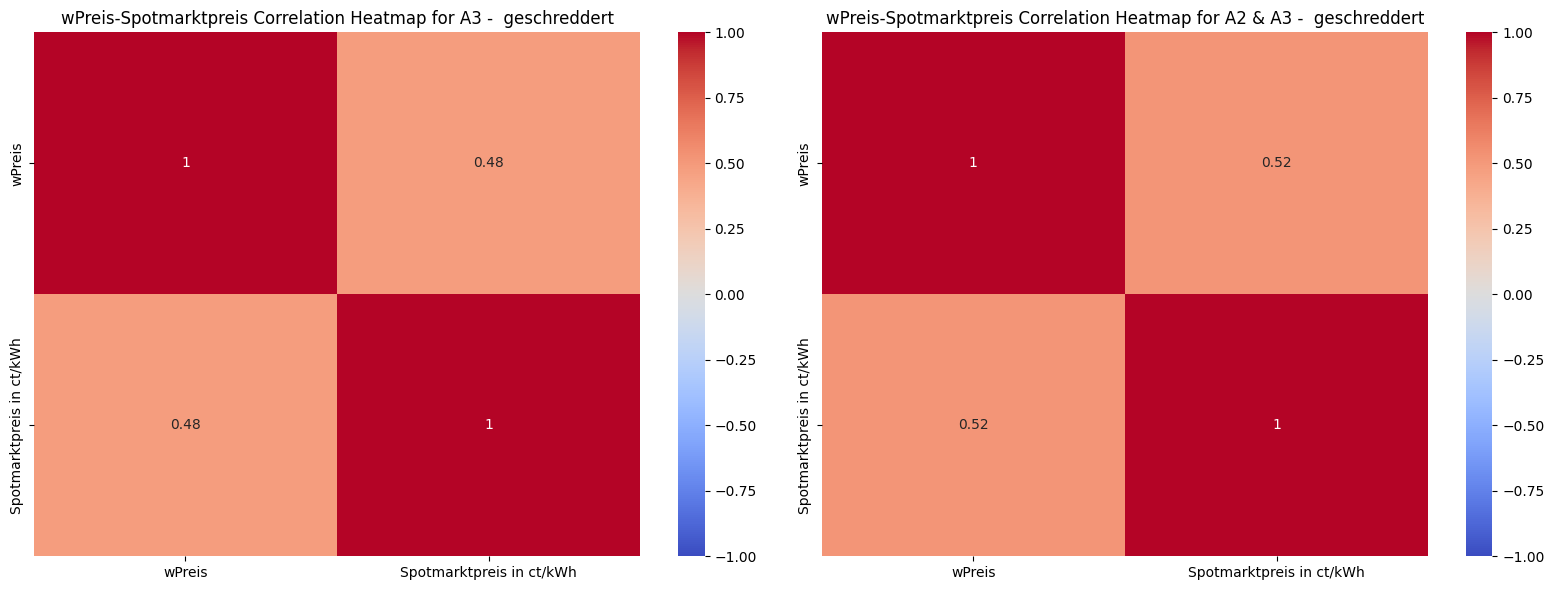

In [745]:
# Create a figure with heatmaps side by side
fig, axes = plt.subplots(1, len(categories), figsize=(16, 6))

# Loop through each category and create a heatmap
for i, category in enumerate(categories):
    category_data = combined_elect[combined_elect['full'] == category]
    
    # Create the correlation heatmap
    correlation_matrix = category_data[['wPreis', 'Spotmarktpreis in ct/kWh']].corr()
    ax_heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axes[i])
    ax_heatmap.set_title(f'wPreis-Spotmarktpreis Correlation Heatmap for {category}')
    
# Adjust layout spacing
plt.tight_layout()

# Show the subplots
plt.show()

#### Correlation for Spotmarktpreis with Lag
Start with 1-week lag

In [746]:
combined_elect['wPreis_lagged_week'] = combined_elect['wPreis'].shift(1)
fig = px.line(combined_elect, x='weekno', y='wPreis_lagged_week', color='full', title='Time Series of wPreis_lagged_week by Category')
fig.add_scatter(x=combined_elect['weekno'], y=combined_elect['Spotmarktpreis in ct/kWh'], mode='lines', name='Spotmarktpreis in ct/kWh')

fig.show()

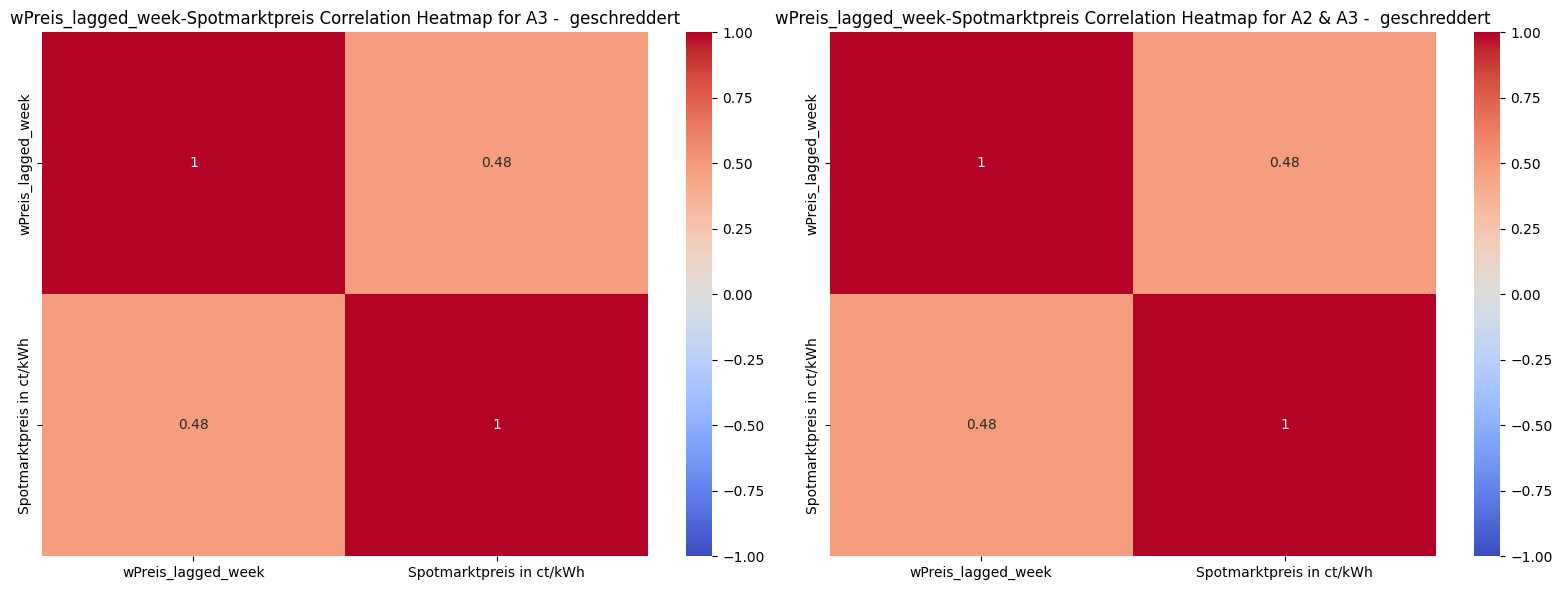

In [747]:
# Create a figure with heatmaps side by side
fig, axes = plt.subplots(1, len(categories), figsize=(16, 6))

# Loop through each category and create a heatmap
for i, category in enumerate(categories):
    category_data = combined_elect[combined_elect['full'] == category]
    
    # Create the correlation heatmap
    correlation_matrix = category_data[['wPreis_lagged_week', 'Spotmarktpreis in ct/kWh']].corr()
    ax_heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axes[i])
    ax_heatmap.set_title(f'wPreis_lagged_week-Spotmarktpreis Correlation Heatmap for {category}')
    
# Adjust layout spacing
plt.tight_layout()

# Show the subplots
plt.show()

Now for lags by a few more weeks:

In [749]:
# Define the range of lags
lags = range(2, 11)

# Create an empty DataFrame to store the results
lag_correlations = pd.DataFrame(columns=['Category', 'Lag', 'Correlation'])

# Loop through each category and lag and calculate the correlation
for category in categories:
    for lag in lags:
        category_data = combined_elect[combined_elect['full'] == category]
        
        # Calculate the lagged variable
        category_data['wPreis_lagged'] = category_data['wPreis'].shift(lag)
        
        # Calculate the correlation between wPreis_lagged and Adj Close**
        correlation = category_data['wPreis_lagged'].corr(category_data['Spotmarktpreis in ct/kWh'])
        
        # Append the result to the DataFrame
        lag_correlations = lag_correlations.append({'Category': category, 'Lag': lag, 'Correlation': correlation}, ignore_index=True)

# Display the correlation coefficients for each category and lag
print(lag_correlations)

                   Category Lag  Correlation
0        A3 -  geschreddert   2     0.432391
1        A3 -  geschreddert   3     0.416149
2        A3 -  geschreddert   4     0.401785
3        A3 -  geschreddert   5     0.385725
4        A3 -  geschreddert   6     0.359828
5        A3 -  geschreddert   7     0.333825
6        A3 -  geschreddert   8     0.301300
7        A3 -  geschreddert   9     0.270280
8        A3 -  geschreddert  10     0.241397
9   A2 & A3 -  geschreddert   2     0.450800
10  A2 & A3 -  geschreddert   3     0.426034
11  A2 & A3 -  geschreddert   4     0.417254
12  A2 & A3 -  geschreddert   5     0.395097
13  A2 & A3 -  geschreddert   6     0.372961
14  A2 & A3 -  geschreddert   7     0.343700
15  A2 & A3 -  geschreddert   8     0.308703
16  A2 & A3 -  geschreddert   9     0.273671
17  A2 & A3 -  geschreddert  10     0.248491


/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_88867/3746744136.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_88867/3746744136.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_88867/3746744136.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

All the correlation coefficients for Spotmarktpreis and wPreis with lags are less than 0.5

### Gas prices

Similar to oil, gas prices have been collected from https://finance.yahoo.com/quote/NG%3DF/history?p=NG%3DF and they are for the whole of Germany.

In [57]:
gas = pd.read_excel('gas.xlsx')
gas.head() 

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Sep 18, 2023",26240,28720,25950,26100,26100,573.732
1,"Sep 11, 2023",26100,28230,25410,26440,26440,786.642
2,"Sep 04, 2023",27000,27080,25000,26050,26050,536.554
3,"Aug 28, 2023",26350,28650,25150,27650,27650,653.74
4,"Aug 21, 2023",25600,26600,24250,25400,25400,415.852


In [58]:
gas["Date"] = pd.to_datetime(gas["Date"])

In [59]:
fig = px.line(gas, x='Date', y='Adj Close**', title='Weekly Adjusted Close Price for Natural Gas')
fig.show()

In [60]:
combined_gas = pd.merge(TS5[['date', 'wPreis', 'full']], gas[['Date', 'Adj Close**']], left_on='date', right_on='Date', how='inner')
# And drop the duplicate 'Date' column 
combined_gas = combined_gas.drop(columns='Date')
combined_gas


,date,wPreis,full,Adj Close**
0,2020-09-14,-29.244584,A3 - geschreddert,20480
1,2020-09-14,-29.244584,A2 & A3 - geschreddert,20480
2,2020-09-21,-27.878925,A3 - geschreddert,21390
3,2020-09-21,-27.878925,A2 & A3 - geschreddert,21390
4,2020-09-28,-25.077400,A3 - geschreddert,24380
...,...,...,...,...
295,2023-08-21,4.426446,A2 & A3 - geschreddert,25400
296,2023-08-28,5.545975,A3 - geschreddert,27650
297,2023-08-28,5.545975,A2 & A3 - geschreddert,27650
298,2023-09-04,8.037723,A3 - geschreddert,26050


In [61]:
# Get unique categories
categories = combined_gas['full'].unique()

# Create a Plotly figure
fig = go.Figure()

# Loop through each category and add a trace for it
for category in categories:
    category_data = combined_gas[combined_gas['full'] == category]
    fig.add_trace(go.Scatter(x=category_data['date'], y=category_data['wPreis'], mode='lines', name=f'wPreis ({category})'))
    fig.add_trace(go.Scatter(x=category_data['date'], y=category_data['Adj Close**'], mode='lines', name=f'Adj Close** ({category})'))

# Customize the layout
fig.update_layout(
    title="Time Series Comparison by Category for the cluster [48,49]",
    xaxis_title="Date",
    yaxis_title="Value",
    xaxis=dict(type='date'),
)

# Show the legend
fig.update_layout(showlegend=True)

# Display the plot
fig.show()

In [62]:
import plotly.subplots as sp

# Create a subplot with two y-axes
fig = sp.make_subplots(specs=[[{"secondary_y": True}]])

# Loop through each category and add traces for both 'wPreis' and 'Adj Close**'
for category in categories:
    category_data = combined_gas[combined_gas['full'] == category]
    
    fig.add_trace(go.Scatter(x=category_data['date'], y=category_data['wPreis'], mode='lines', name=f'wPreis ({category})'))
    fig.add_trace(go.Scatter(x=category_data['date'], y=category_data['Adj Close**'], mode='lines', name=f'Adj Close** ({category})', yaxis='y2'))

# Customize the layout
fig.update_layout(
    title="Time Series Comparison by Category for the cluster [48,49]",
    xaxis_title="Date",
    xaxis=dict(type='date'),
)

# Set y-axis titles
fig.update_yaxes(title_text="wPreis", secondary_y=False)
fig.update_yaxes(title_text="Adj Close**", secondary_y=True)

# Show the legend
fig.update_layout(showlegend=True)

# Display the plot
fig.show()

This shows that for gas, the correlation is not that much (as compared to some time periods with Oil). Best we can say is that the general trend is rising for both from Jan 2021 until around Dec 2022 and after that the wPreis continues to rise while gas prices rise sharply and fall sharply.

### 2. Weather (Wind, Temp)

To get the weather data, first we need to find the center of each ***Postleitzahl***.
Here are the centers based on <https://academickids.com/encyclopedia/index.php/List_of_postal_codes_in_Germany> and <https://simple.wikipedia.org/wiki/Postal_codes_in_Germany>:

- 20: Hamburg (53.5507,9.993)
- 21: Hamburg (53.5507,9.993), Elbinsel Wilhelmsburg (53.5067,9.9871), Kirchdorf (52.5952,8.8349), Reinbek (53.517,10.2488), Buchholz in der Nordheide (53.3264,9.8681), Stade (53.5934,9.4763), Freiburg/Elbe (53.8236,9.2854), Balje (53.8333,9.1333)
- 22: Hamburg (53.5507,9.993)
- 23: Lübeck (53.8689,10.6873), Plön (54.1624,10.4233)
- 24: Kiel (54.3213,10.1349), Altenholz (54.4,10.1333), Gettorf (54.4,9.9833), Eckernförde (54.4685,9.8382), Neumünster (54.0748,9.9819), Henstedt-Ulzburg (53.7903,10.0054), Kaltenkirchen (53.8329,9.9581), Bad Bramstedt (53.9183,9.8842), Nortorf (54.1674,9.8544), Hohenwestedt (54.0889,9.6536), Boostedt (54.0167,10.0333), Trappenkamp (54.0399,10.215), Rendsburg (54.3066,9.6631), Büdelsdorf (54.3184,9.673), Flensburg (54.7843,9.4396)
- 25: Uetersen (53.6877,9.6639), Tornesch (53.7,9.7167), Moorrege (53.6667,9.6667), Heidgraben (53.7079,9.681), Groß Nordende (53.7,9.65), Neuendeich (53.6833,9.6167), Marne (54.35,8.7667), Husum (54.4858,9.0524) , Schwabstedt (54.3971,9.1865)
- 26: Bad Zwischenahn (53.1833,8), Wilhelmshaven (53.53,8.1125), Aurich (53.4692,7.4823), Apen (53.2167,7.8), Leer (53.2316,7.461), Moormerland (53.3114,7.423), Rhauderfehn (53.1333,7.6167), Hesel (53.3,7.6), Jemgum (53.2667,7.3833), Elsfleth (53.2375,8.4566)
- 27: Steinkirchen (53.566,9.6111), Hollern-Twielenfleth (53.5998,9.5522)
- 28: Bremen (53.0758,8.8072)


In [63]:
w_average_20212223 = pd.read_csv('w_average_20212223.csv')
w_average_20212223.head()

,time,temperature_2m,windspeed_10m
0,2020-08-31,15.086667,12.055972
1,2020-09-07,15.696012,13.736131
2,2020-09-14,15.897143,9.828214
3,2020-09-21,14.293631,10.337440
4,2020-09-28,13.913393,13.442738


In [64]:
fig = px.line(w_average_20212223, x='time', y='temperature_2m', title='Weekly Average temperature for [20,21,22,23]')
fig.show()

In [65]:
fig = px.line(w_average_20212223, x='time', y='windspeed_10m', title='Weekly Average Windspeed for [20,21,22,23]')
fig.show()

In [66]:
w_average_2425 = pd.read_csv('w_average_2425.csv')
w_average_2425.head()

,time,temperature_2m,windspeed_10m
0,2020-08-31,14.895978,13.189757
1,2020-09-07,15.450050,15.893477
2,2020-09-14,15.376488,9.461508
3,2020-09-21,14.164906,10.715501
4,2020-09-28,14.034127,14.531374


In [67]:
fig = px.line(w_average_2425, x='time', y='temperature_2m', title='Weekly Average temperature for [24,25]')
fig.show()

In [68]:
fig = px.line(w_average_2425, x='time', y='windspeed_10m', title='Weekly Average Windspeed for [24,25]')
fig.show()

In [69]:
w_average_262728 = pd.read_csv('w_average_262728.csv')
w_average_262728.head()

,time,temperature_2m,windspeed_10m
0,2020-08-31,14.860043,11.411912
1,2020-09-07,15.506044,13.409341
2,2020-09-14,15.953388,10.843498
3,2020-09-21,14.099313,11.294643
4,2020-09-28,13.875549,14.582280


In [70]:
fig = px.line(w_average_262728, x='time', y='temperature_2m', title='Weekly Average temperature for [26,27,28]')
fig.show()

In [71]:
fig = px.line(w_average_262728, x='time', y='windspeed_10m', title='Weekly Average Windspeed for [26,27,28]')
fig.show()

3. Business Cycle (DAX)

MORE...